In [2]:
import pandas as pd

df = pd.read_csv('WineQT.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

C:\Users\Diego\AppData\Local\Temp\ipykernel_11224\4235371610.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=name,kde=True,palette="viridis")
C:\Users\Diego\AppData\Local\Temp\ipykernel_11224\4235371610.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=name,kde=True,palette="viridis")
C:\Users\Diego\AppData\Local\Temp\ipykernel_11224\4235371610.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=name,kde=True,palette="viridis")
C:\Users\Diego\AppData\Local\Temp\ipykernel_11224\4235371610.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=name,kde=True,palette="viridis")
C:\Users\Diego\AppData\Local\Temp\ipykernel_11224\4235371610.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=name,kde=True,pale

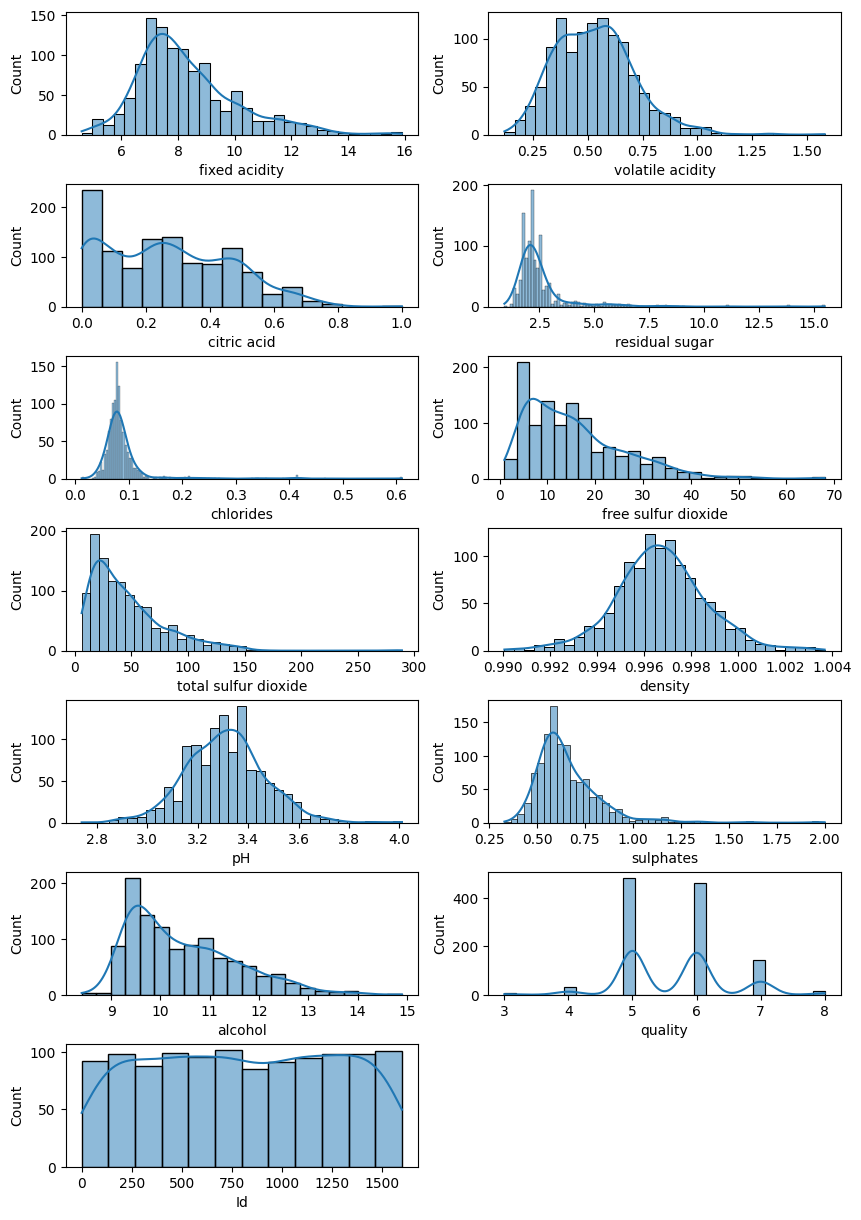

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = df.columns.tolist()
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.4)
i = 1
for name in columns:
    plt.subplot(7,2,i)
    sns.histplot(data=df, x=name,kde=True,palette="viridis")
    i = i + 1

In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

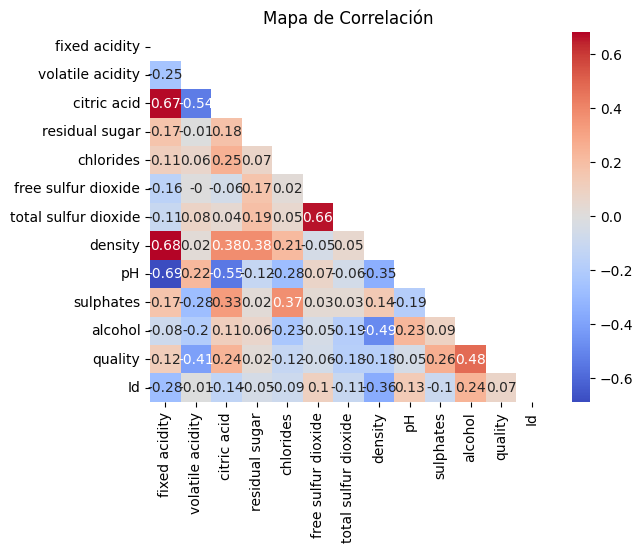

In [11]:
# Crear un heatmap
import numpy as np
corr = df.corr().round(2)
plt.figure()
mask  = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)


plt.title('Mapa de Correlación')
plt.show()

In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np

# 1. Prepare the data
X = df.drop('quality', axis=1)
y = df['quality'] - 3

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# 2. Create and train the models
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# 3. Make predictions
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

 4. Evaluación de Modelos:

- Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
- Generar un informe de clasificación para cada modelo.
- Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

In [19]:
# 4. Evaluate Model Performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("-" * 50)


In [20]:
# 5. Evaluate models
evaluate_model(y_test, rf_pred, "Random Forest")

Performance Metrics for Random Forest:
Accuracy: 0.6608391608391608
Precision: 0.652069330607721
Recall: 0.6608391608391608
F1 Score: 0.6393991254646992

Confusion Matrix:
 [[ 0  0  2  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 92 29  1  0]
 [ 0  0 21 79  3  0]
 [ 0  0  1 28 18  0]
 [ 0  0  0  1  1  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        10
           2       0.75      0.75      0.75       122
           3       0.56      0.77      0.65       103
           4       0.78      0.38      0.51        47
           5       0.00      0.00      0.00         2

    accuracy                           0.66       286
   macro avg       0.35      0.32      0.32       286
weighted avg       0.65      0.66      0.64       286

--------------------------------------------------


c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [21]:
evaluate_model(y_test, xgb_pred, "XGBoost")

Performance Metrics for XGBoost:
Accuracy: 0.6433566433566433
Precision: 0.6338209204588515
Recall: 0.6433566433566433
F1 Score: 0.6257772925201422

Confusion Matrix:
 [[ 0  0  2  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 83 35  4  0]
 [ 0  0 20 80  3  0]
 [ 0  0  1 25 21  0]
 [ 0  0  0  1  1  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        10
           2       0.74      0.68      0.71       122
           3       0.55      0.78      0.65       103
           4       0.72      0.45      0.55        47
           5       0.00      0.00      0.00         2

    accuracy                           0.64       286
   macro avg       0.34      0.32      0.32       286
weighted avg       0.63      0.64      0.63       286

--------------------------------------------------


c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [22]:
evaluate_model(y_test, knn_pred, "K-Nearest Neighbors")

Performance Metrics for K-Nearest Neighbors:
Accuracy: 0.486013986013986
Precision: 0.46224625419144133
Recall: 0.486013986013986
F1 Score: 0.4589912369229539

Confusion Matrix:
 [[ 0  0  1  1  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 74 43  5  0]
 [ 0  2 39 58  4  0]
 [ 0  0 16 24  7  0]
 [ 0  0  0  2  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        10
           2       0.54      0.61      0.57       122
           3       0.44      0.56      0.49       103
           4       0.44      0.15      0.22        47
           5       0.00      0.00      0.00         2

    accuracy                           0.49       286
   macro avg       0.24      0.22      0.21       286
weighted avg       0.46      0.49      0.46       286

--------------------------------------------------


c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

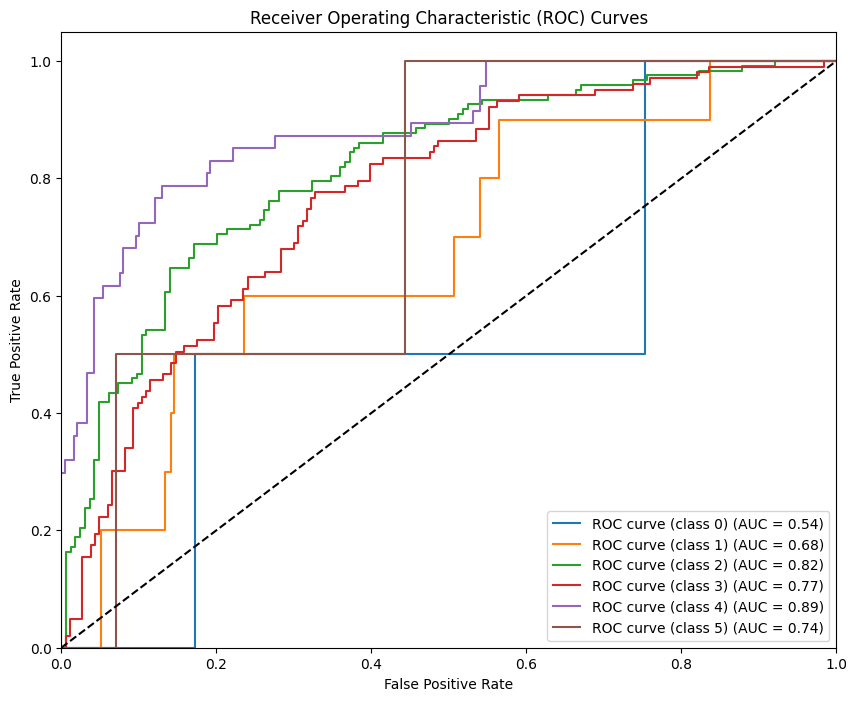

In [25]:
unique_classes = sorted(y.unique())
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output (one-vs-rest approach)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_pred_proba = xgb_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, 
             label=f'ROC curve (class {unique_classes[i]}) (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()